In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rukenmissonnier/final-house")

print("Path to dataset files:", path)

C:\Users\mmice\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████| 144k/144k [00:00<00:00, 3.09MB/s]

Extracting files...
Path to dataset files: C:\Users\mmice\.cache\kagglehub\datasets\rukenmissonnier\final-house\versions\4


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

file_path = r"C:\Users\mmice\.cache\kagglehub\datasets\rukenmissonnier\final-house\versions\4\house.csv"
df = pd.read_csv(file_path)

df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


## Data Dictionary

Bedroom Count: This attribute represents the number of bedrooms in the housing unit, providing insights into its size and capacity.

Net Square Meters (Net Sqm): Net square meters refer to the total usable interior space within the housing unit, excluding common areas like corridors and stairwells. It quantifies the size of the property.

Center Distance: This attribute measures the distance of the housing unit from the central or downtown area of a city or town. It is a valuable metric for potential buyers or renters to assess proximity to urban amenities and activities.

Metro Distance: Metro distance indicates the distance between the housing unit and the nearest metro or subway station. This information is particularly useful for individuals who rely on public transportation for their daily commute.

Floor: The floor attribute specifies the level or story of the housing unit within the building, offering insights into its placement and accessibility within the structure.

Age: The age of the property represents the number of years since its construction or renovation. It plays a crucial role in assessing the condition of the property and potential maintenance requirements.

Price: Price is the cost associated with purchasing or renting the housing unit. It is a fundamental factor for individuals making housing decisions and can be influenced by various attributes such as bedroom count, size, location, and age.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [8]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [10]:
df.isna().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [12]:
num_attributes = df

corr_matrix = num_attributes.corr()

corr_matrix["price"].sort_values(ascending=False)

price              1.000000
net_sqm            0.681987
bedroom_count      0.552405
floor             -0.136713
metro_distance    -0.146373
age               -0.225119
center_distance   -0.418161
Name: price, dtype: float64

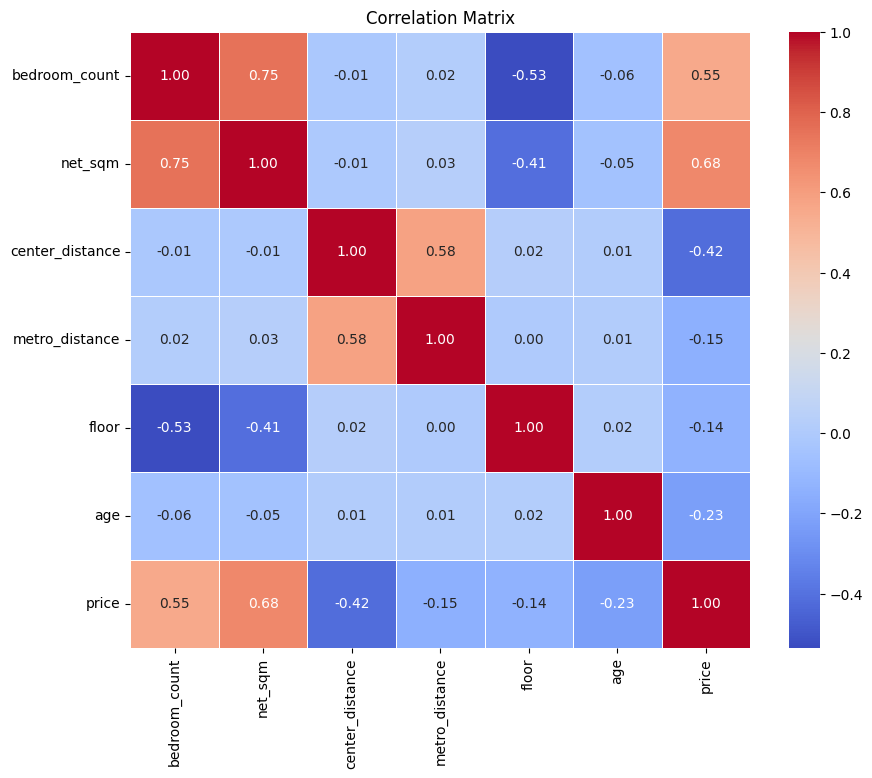

In [15]:
#heatmap for the selected numerical values

plt.figure(figsize=(10, 8))  # Adjust figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(columns = 'price', axis = 1)
X_2 = df[['bedroom_count', 'net_sqm']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2, random_state = 42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y, test_size = .2, random_state = 42)

In [25]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select numeric and categorical columns for preprocessing
num_columns = ['net_sqm', 'bedroom_count', 'floor', 'metro_distance', 'age', 'center_distance']

num_columns_2 = ['net_sqm', 'bedroom_count']

# Create the numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Create the column transformer for preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_columns),  # Apply numeric pipeline to numeric columns
    ])

preprocessing_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_columns_2),  # Apply numeric pipeline to numeric columns
    ])

# Apply the transformations to X_train (without y_train)
X_train_prepared = preprocessing.fit_transform(X_train)

X_train_2_prepared = preprocessing_2.fit_transform(X_train_2)

# If needed, check the shape of the transformed data
print(f"Transformed X_train shape: {X_train_prepared.shape}")

Transformed X_train shape: (3446, 6)


In [26]:
from sklearn.model_selection import cross_val_score

#instantiate a linear model, fit it with our preprocessed x train data and our y train data
lin_reg = LinearRegression() 
lin_reg.fit(X_train_prepared, y_train)

#get rmse scores for our linear model
cv_scores_lin_model = -cross_val_score(lin_reg, X_train_prepared, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cv_scores_lin_model).describe()

count      10.000000
mean     2095.990748
std       167.001202
min      1931.922271
25%      2011.835609
50%      2049.555289
75%      2141.037623
max      2511.494477
dtype: float64

In [29]:
from sklearn.model_selection import cross_val_score

#instantiate a linear model, fit it with our preprocessed x train data and our y train data
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(X_train_2_prepared, y_train)

#get rmse scores for our linear model
cv_scores_lin_model = -cross_val_score(lin_reg, X_train_2_prepared, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cv_scores_lin_model).describe()

count      10.000000
mean     2875.873910
std        93.243109
min      2758.870613
25%      2800.929625
50%      2866.703703
75%      2930.657518
max      3025.237036
dtype: float64

In [51]:
X_test_transformed = preprocessing.transform(X_test)

y_predictions = lin_reg.predict(X_test_transformed)


from sklearn.metrics import mean_squared_error, r2_score

final_rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
r2 = r2_score(y_test, y_predictions)

print("Our Final RMSE is", final_rmse)
print("\nOur R2 score is", r2)

Our Final RMSE is 2007.181602462176

Our R2 score is 0.7292844173359683


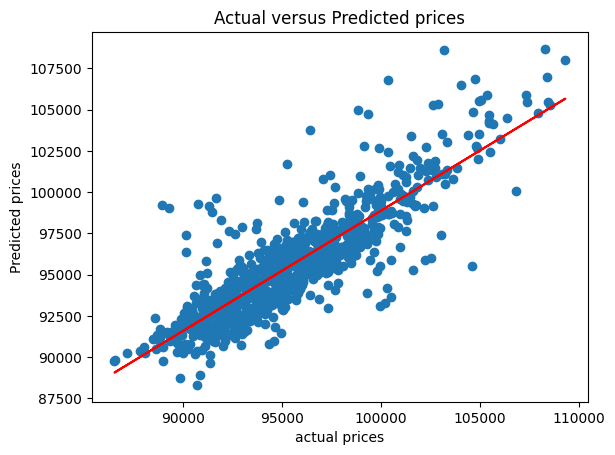

In [54]:
x_axis = y_test
y_axis = y_predictions

plt.scatter(x_axis, y_axis)
z = np.polyfit(x_axis, y_axis, 1)  # Fit a linear model (degree 1)
p = np.poly1d(z)  # Create a polynomial from the coefficients
plt.plot(x_axis, p(x_axis), color='red', label='Trendline')  # Plot the trendline
plt.xlabel('actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual versus Predicted prices')
plt.show()